<a href="https://colab.research.google.com/github/amoreano/pool/blob/main/Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn==1.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando librerias

In [3]:
# Al tratamiento de los datos
import pandas as pd
import numpy as np

# Visualización de los Datos
from matplotlib import pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Librerias para  machine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier


Cargando DataFrame "rendimiento.csv" 

In [4]:
df_rendimiento=pd.read_csv("/content/RendimientoEscolar.csv", sep=";")

In [5]:
df_rendimiento

,Marca temporal,Género,Edad,Grado de estudios,Distrito en el que vives,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuál de las siguientes redes sociales usas para buscar información para tus tareas,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Dependes de alguna persona,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Establecimiento en el que estudia es,Promedio ponderado durante el año
0,10/24/2022 10:15:39,2,15,2,2,1,2,2,3,2,1,1,2,3,1,1,2,4,1,Google,5,2,3,0,1,1,3,2,4,2,1,2,1,2,1,Público,15
1,10/24/2022 10:18:29,2,14,2,1,2,2,2,1,2,1,1,1,1,1,1,1,6,1,"Google, Facebook, Wasap, Tiktok",3,2,1,0,1,1,4,4,3,1,1,3,0,4,1,Público,18
2,10/24/2022 10:21:52,1,16,1,1,1,2,1,3,2,4,1,3,3,1,1,3,2,1,"Google, Facebook, Instagram, Wasap",6,4,3,0,1,2,2,1,2,4,4,1,1,1,1,Público,13
3,10/24/2022 10:25:45,1,17,1,1,1,1,1,2,1,3,3,3,5,1,2,2,0,1,"Google, Instagram, Wasap, Tiktok",7,1,3,0,1,2,1,1,2,1,3,2,1,2,1,Público,11
4,10/24/2022 10:27:46,2,16,1,1,2,2,2,3,2,2,1,2,2,1,1,1,2,1,Google,5,2,3,0,1,1,4,2,4,2,1,2,0,2,3,Público,16
5,10/24/2022 10:31:54,2,15,2,1,2,2,2,1,2,2,1,1,1,1,1,1,6,1,"Google, Facebook, Twitter, Tiktok",4,2,2,0,1,1,4,3,3,2,1,2,0,3,1,Público,16
6,10/24/2022 10:36:28,1,17,1,1,2,2,2,1,2,2,1,1,1,1,1,1,6,1,"Google, Facebook, Twitter, Instagram, Wasap, T...",3,2,1,0,1,1,4,4,3,1,1,2,0,4,2,Público,17
7,10/24/2022 10:39:30,2,16,1,1,2,2,2,1,2,2,1,1,1,1,1,1,5,1,"Google, Facebook, Twitter, Instagram, Wasap, T...",4,2,2,0,1,1,4,4,3,2,4,2,0,4,2,Público,16
8,10/24/2022 10:43:07,2,16,1,1,2,2,2,1,2,1,1,1,1,1,1,1,5,1,"Google, Facebook, Twitter, Instagram, Wasap, T...",4,2,2,0,1,1,4,2,3,1,2,1,0,3,1,Público,15
9,10/24/2022 10:46:23,1,15,2,1,1,2,2,1,2,2,1,1,1,1,1,1,3,1,"Google, Instagram, Tiktok",4,3,2,0,1,1,3,3,3,2,1,3,1,2,1,Público,15


In [6]:
# visualizando el tipo de dato del data frame
df_rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 37 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Marca temporal                                                                      101 non-null    object
 1   Género                                                                              101 non-null    int64 
 2   Edad                                                                                101 non-null    int64 
 3   Grado de estudios                                                                   101 non-null    int64 
 4   Distrito en el que vives                                                            101 non-null    int64 
 5   Trabajas                                                                            101 non-null    int64 

In [7]:
# Hacemos un resumen con la estadistica descriptiva
df_rendimiento.shape

(101, 37)

Depurando datos

In [8]:
#Depurando las variables "Marca temporal, Distrito en el que vives, Cuál de las siguientes redes sociales usas para buscar información para tus tareas, Establecimiento en el que estudia es", por ser irrelevante para el estudio 
df_rendimiento.drop(['Marca temporal'], axis = 1, inplace=True)
df_rendimiento.drop(['Distrito en el que vives'], axis = 1, inplace=True)
df_rendimiento.drop(['Cuál de las siguientes redes sociales usas para buscar información para tus tareas'], axis = 1, inplace=True)
df_rendimiento.drop(['Establecimiento en el que estudia es'], axis = 1, inplace=True)
df_rendimiento.drop(['Dependes de alguna persona'], axis = 1, inplace=True)

In [9]:
#Verificando eliminación de variables 
df_rendimiento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 32 columns):
 #   Column                                                                          Non-Null Count  Dtype
---  ------                                                                          --------------  -----
 0   Género                                                                          101 non-null    int64
 1   Edad                                                                            101 non-null    int64
 2   Grado de estudios                                                               101 non-null    int64
 3   Trabajas                                                                        101 non-null    int64
 4   Consumes drogas                                                                 101 non-null    int64
 5   Consumes licor                                                                  101 non-null    int64
 6   Llegas puntual a las  clases      

In [10]:
df_rendimiento.describe()

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.514851,15.683168,1.495050,1.732673,1.900990,1.851485,2.079208,1.891089,1.950495,1.534653,1.950495,2.346535,1.148515,1.247525,1.465347,3.544554,1.108911,4.188119,2.306931,2.128713,1.128713,1.079208,3.297030,2.762376,3.049505,2.425743,2.257426,2.237624,0.346535,2.534653,1.316832,14.465347
std,0.502272,0.773701,0.502469,0.444772,0.300165,0.357383,0.976557,0.313081,0.841145,0.855153,0.920611,1.337428,0.357383,0.433727,0.671779,2.123793,0.313081,1.110971,0.731335,0.879356,0.890656,0.271410,0.819079,1.011420,0.683758,1.298819,1.308843,0.838433,0.478239,0.975339,0.508541,2.447711
min,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000
25%,1.000000,15.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,13.000000
50%,2.000000,16.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.000000,3.000000,1.000000,15.000000
75%,2.000000,16.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,5.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,2.000000,16.000000
max,2.000000,17.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,5.000000,2.000000,2.000000,3.000000,8.000000,2.000000,8.000000,4.000000,5.000000,3.000000,2.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,1.000000,4.000000,3.000000,20.000000


   count  percent
2     91     90.1
1     10      9.9


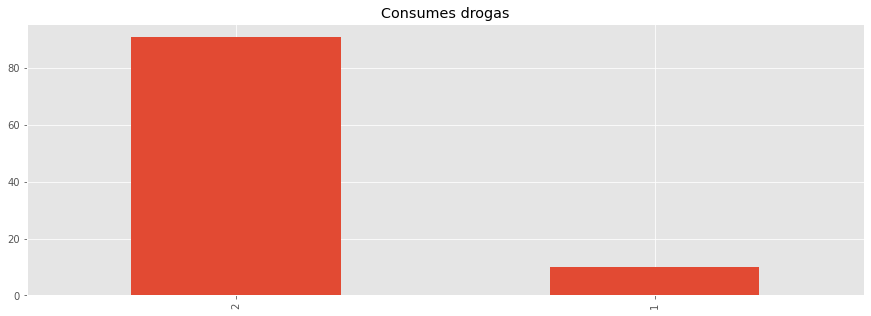

In [11]:
#visualizando el dato.
plt.figure(figsize=(15, 5))
feature = "Consumes drogas"
count = df_rendimiento[feature].value_counts()
percent = 100*df_rendimiento[feature].value_counts(normalize=True)
df3= pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df3)

#mostrando el 
count.plot(kind='bar', title=feature)
plt.show()

   count  percent
2     90     89.1
1     11     10.9


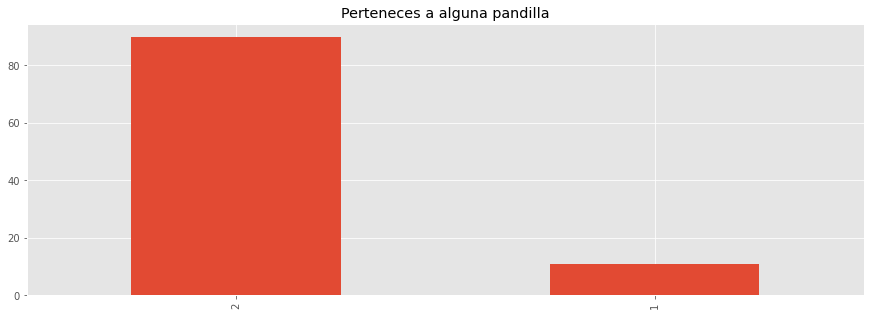

In [12]:
#visualizando el dato.
plt.figure(figsize=(15, 5))
feature = "Perteneces a alguna pandilla"
count = df_rendimiento[feature].value_counts()
percent = 100*df_rendimiento[feature].value_counts(normalize=True)
df4= pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df4)

#mostrando el 
count.plot(kind='bar', title=feature)
plt.show()

   count  percent
1     86     85.1
2     15     14.9


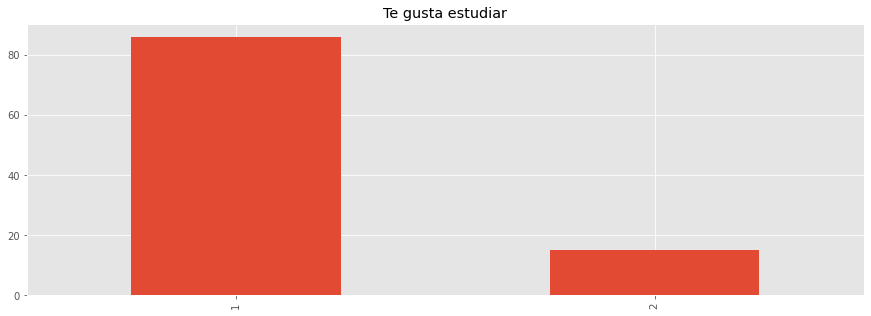

In [13]:
#visualizando el dato.
plt.figure(figsize=(15, 5))
feature = "Te gusta estudiar"
count = df_rendimiento[feature].value_counts()
percent = 100*df_rendimiento[feature].value_counts(normalize=True)
df5= pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df5)

#mostrando el 
count.plot(kind='bar', title=feature)
plt.show()

    count  percent
15     21     20.8
16     13     12.9
17     13     12.9
13     12     11.9
12     11     10.9
18      8      7.9
11      7      6.9
14      7      6.9
10      7      6.9
20      2      2.0


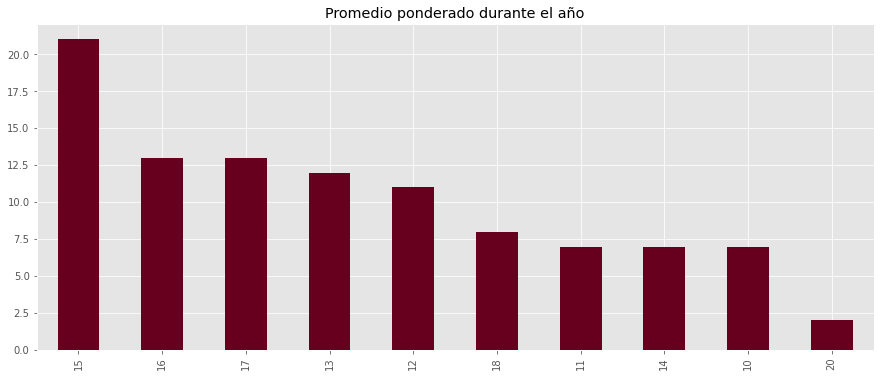

In [14]:
plt.figure(figsize=(15, 6))

# Variable rendimientoT --> variable Target
feature = 'Promedio ponderado durante el año' 
count = df_rendimiento[feature].value_counts()
percent = 100*df_rendimiento[feature].value_counts(normalize=True)
a1 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='bar', title=feature, grid=bool, cmap="RdBu" );

In [15]:
# Convirtiendo la variable rendimiento de multiclase a clasificación docotomica
df_rendimiento['rendimientoT'] = np.where(df_rendimiento['Promedio ponderado durante el año']>=11, 'Aprobado', 'Desaprobado')
df_rendimiento

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año,rendimientoT
0,2,15,2,1,2,2,3,2,1,1,2,3,1,1,2,4,1,5,2,3,0,1,3,2,4,2,1,2,1,2,1,15,Aprobado
1,2,14,2,2,2,2,1,2,1,1,1,1,1,1,1,6,1,3,2,1,0,1,4,4,3,1,1,3,0,4,1,18,Aprobado
2,1,16,1,1,2,1,3,2,4,1,3,3,1,1,3,2,1,6,4,3,0,1,2,1,2,4,4,1,1,1,1,13,Aprobado
3,1,17,1,1,1,1,2,1,3,3,3,5,1,2,2,0,1,7,1,3,0,1,1,1,2,1,3,2,1,2,1,11,Aprobado
4,2,16,1,2,2,2,3,2,2,1,2,2,1,1,1,2,1,5,2,3,0,1,4,2,4,2,1,2,0,2,3,16,Aprobado
5,2,15,2,2,2,2,1,2,2,1,1,1,1,1,1,6,1,4,2,2,0,1,4,3,3,2,1,2,0,3,1,16,Aprobado
6,1,17,1,2,2,2,1,2,2,1,1,1,1,1,1,6,1,3,2,1,0,1,4,4,3,1,1,2,0,4,2,17,Aprobado
7,2,16,1,2,2,2,1,2,2,1,1,1,1,1,1,5,1,4,2,2,0,1,4,4,3,2,4,2,0,4,2,16,Aprobado
8,2,16,1,2,2,2,1,2,1,1,1,1,1,1,1,5,1,4,2,2,0,1,4,2,3,1,2,1,0,3,1,15,Aprobado
9,1,15,2,1,2,2,1,2,2,1,1,1,1,1,1,3,1,4,3,2,0,1,3,3,3,2,1,3,1,2,1,15,Aprobado


             count  percent
Aprobado        94     93.1
Desaprobado      7      6.9


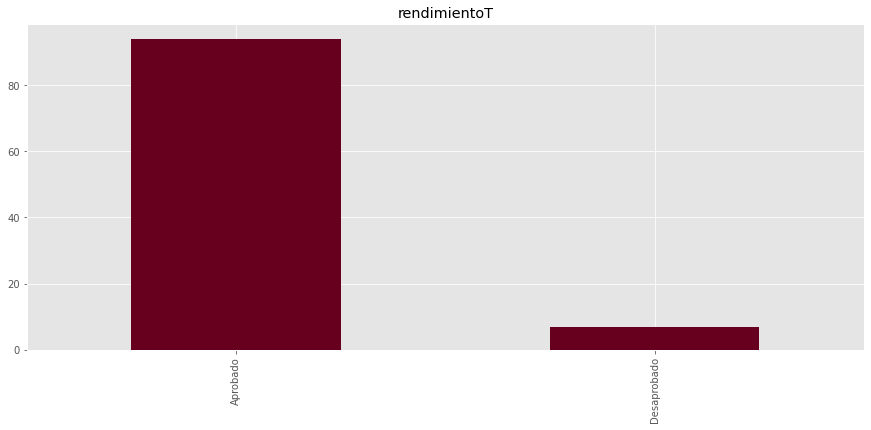

In [16]:
plt.figure(figsize=(15, 6))

# Variable rendimientoT --> variable Target
feature = 'rendimientoT' 
count = df_rendimiento[feature].value_counts()
percent = 100*df_rendimiento[feature].value_counts(normalize=True)
a1 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(a1)
count.plot(kind='bar', title=feature, grid=bool, cmap="RdBu" );

In [17]:
#Hay un desbalance entre aprobado y Desaprobados estos datos debemos balancear
count_rendimientoT_Aprobado, count_rendimientoT_Desaprobado = df_rendimiento.rendimientoT.value_counts()
print ('Cantidad por filas de rendimientoT')
print('rendimientoT_Desaprobado: ',count_rendimientoT_Desaprobado)
print('rendimientoT_Aprobado  : ',count_rendimientoT_Aprobado)

Cantidad por filas de rendimientoT
rendimientoT_Desaprobado:  7
rendimientoT_Aprobado  :  94


In [18]:
# Dividiendo por sets el rendimientoT
df_rendimientoT_Desaprobado = df_rendimiento[df_rendimiento['rendimientoT'] == 'Desaprobado']
df_rendimientoT_Aprobado = df_rendimiento[df_rendimiento['rendimientoT'] == 'Aprobado']

print('Dimensión por tipo de rendimientoT')
print('Dim rendimientoT Desaprobado: ',df_rendimientoT_Desaprobado.shape)
print('Dim rendimientoT Aprobado   : ',df_rendimientoT_Aprobado.shape)

Dimensión por tipo de rendimientoT
Dim rendimientoT Desaprobado:  (7, 33)
Dim rendimientoT Aprobado   :  (94, 33)


In [19]:
#Balanceo se define df_under como el data frame final
df_rendimientoT_Aprobado_under = df_rendimientoT_Aprobado.sample(count_rendimientoT_Desaprobado) 

# dataframe Balanceado.
df_under = pd.concat([df_rendimientoT_Aprobado_under, df_rendimientoT_Desaprobado], axis=0)

In [20]:
#Imprimiendo valores
print('Dimensión por tipo de rendimientoT en general')
print('')
print('Dim df_rendimientoT_Aprobado under: ',df_rendimientoT_Aprobado_under.shape)
print('Dim df_rendimientoT_Desaprobado under  : ',df_rendimientoT_Desaprobado.shape)
print('                                    =========')
print('Dim df_under                     : ',df_under.shape)

Dimensión por tipo de rendimientoT en general

Dim df_rendimientoT_Aprobado under:  (7, 33)
Dim df_rendimientoT_Desaprobado under  :  (7, 33)
Dim df_under                     :  (14, 33)


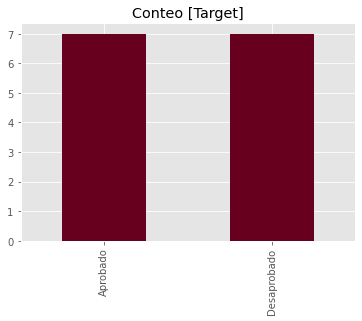

In [21]:
df_under.rendimientoT.value_counts().plot(kind='bar', title='Conteo [Target]', grid=bool, cmap="RdBu" );

In [22]:
#Visualisando dataframe
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 32 to 76
Data columns (total 33 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Género                                                                          14 non-null     int64 
 1   Edad                                                                            14 non-null     int64 
 2   Grado de estudios                                                               14 non-null     int64 
 3   Trabajas                                                                        14 non-null     int64 
 4   Consumes drogas                                                                 14 non-null     int64 
 5   Consumes licor                                                                  14 non-null     int64 
 6   Llegas puntual a las  clase

In [23]:
# Visualisando registros duplicados
print('Total de registros duplicados: ',df_under.duplicated().sum())

Total de registros duplicados:  0


In [24]:
# Revisando la cantidad de datos perdidos e Imputando si hubiera.
df_under.isnull().sum()

Género                                                                            0
Edad                                                                              0
Grado de estudios                                                                 0
Trabajas                                                                          0
Consumes drogas                                                                   0
Consumes licor                                                                    0
Llegas puntual a las  clases                                                      0
Perteneces a alguna pandilla                                                      0
Qué tan responsable se considera                                                  0
Considera posible terminar el año escolar                                         0
Cómo te consideras en los estudios                                                0
Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lengua

In [25]:
# Guardamos una copia de los datos
df1=df_under.copy()

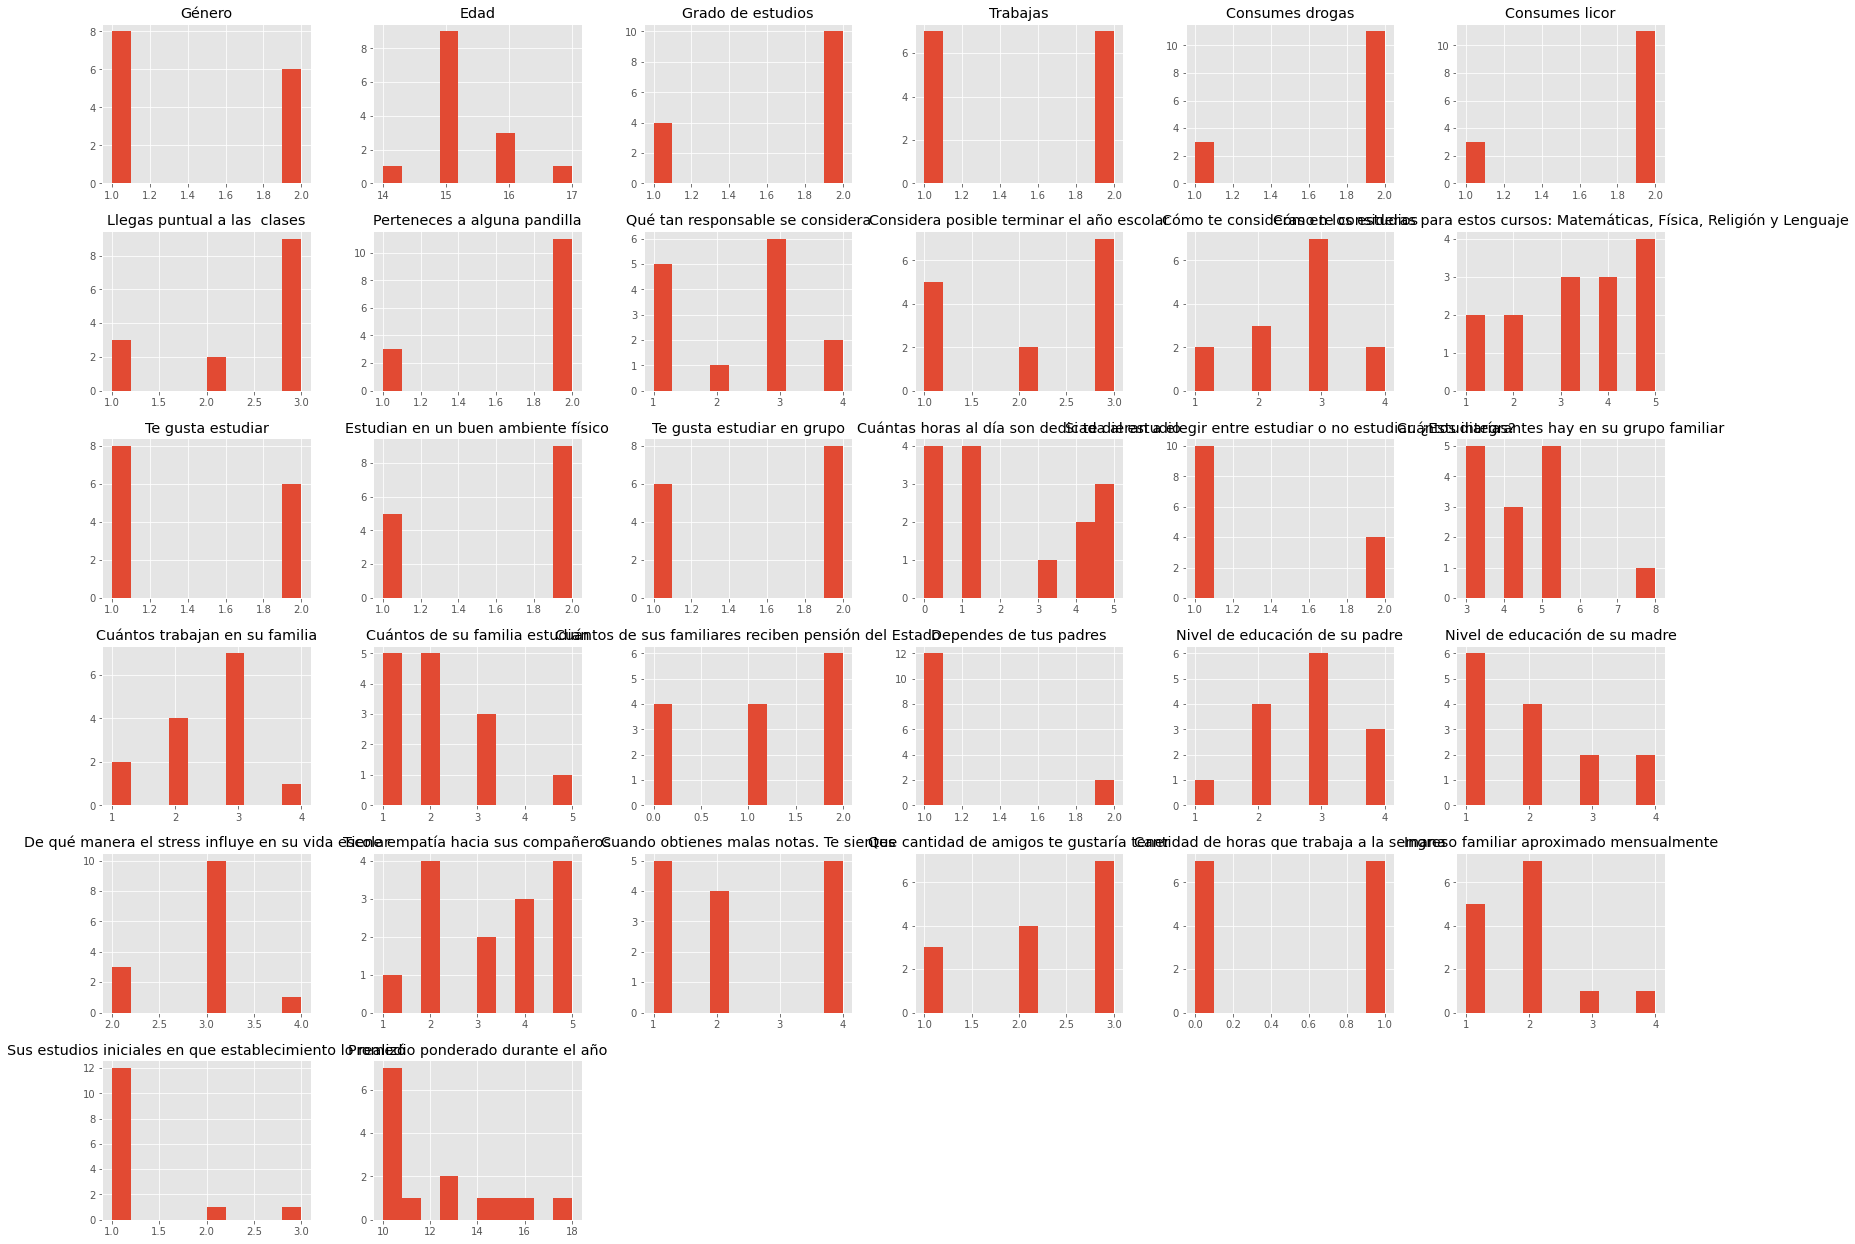

In [26]:
# Visualizando el histograma de las variables numericas
df1.hist(figsize=(28,22))
plt.show()

Test de Normalidad

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos
Ha: Los datos no estan normalmente distribuidos
Nivel de significancia = 5% (0.05)

In [27]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

In [28]:
from scipy.stats import shapiro

Se define funcion test_kolmogorov_Smirnov

In [29]:
def test_Kolmogorov_Smirnov(p2):
  # Test normalidad: Promedio ponderado durante el año
  var1 = p2
  qqplot(df1[(var1)] , line='s')
  plt.show()

  # Test de Kolmogorov-Smirnov
  #Cuando n > 50
  print('')
  stat2, p2 = kstest(df1[(var1)], 'norm')
  
  print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
  if(p2<0.05):
    print('\nComo el p-value es: ' + str(p2) + ' < 0.05 (5%) ==> rechazamos la Ho y aceptamos la Ha.')
    print('Decisión: Con un nivel de significancia del 5%, se afirma que : \nel dato de la variable : ' + var1 + ' no está normalmente distribuidos.')
  else:
    print('\nComo el p-value es: ' + str(p2) + ' >= 0.05 (5%) ==> rechazamos la Ha y aceptamos la Ho.')
    print('Decisión: Con un nivel de significancia del 5%, se afirma que : \nel dato de la variable : ' + var1 + ' está normalmente distribuidos.')
  print('')

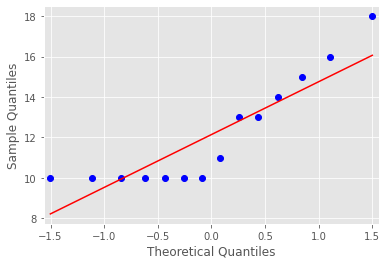


Estadisticos=1.000, p-value=0.000

Como el p-value es: 0.0 < 0.05 (5%) ==> rechazamos la Ho y aceptamos la Ha.
Decisión: Con un nivel de significancia del 5%, se afirma que : 
el dato de la variable : Promedio ponderado durante el año no está normalmente distribuidos.



In [30]:
# Ejecucion del test_Kolmogrov_Smirnov
test_Kolmogorov_Smirnov("Promedio ponderado durante el año")

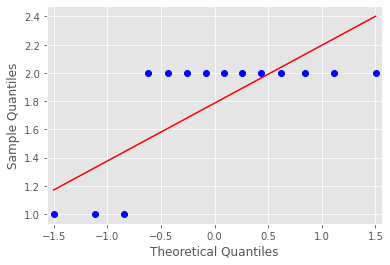


Estadisticos=0.841, p-value=0.000

Como el p-value es: 1.3204011744245024e-11 < 0.05 (5%) ==> rechazamos la Ho y aceptamos la Ha.
Decisión: Con un nivel de significancia del 5%, se afirma que : 
el dato de la variable : Consumes drogas no está normalmente distribuidos.



In [31]:
test_Kolmogorov_Smirnov("Consumes drogas")

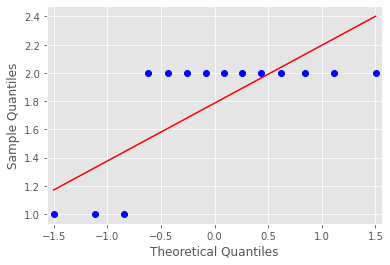


Estadisticos=0.841, p-value=0.000

Como el p-value es: 1.3204011744245024e-11 < 0.05 (5%) ==> rechazamos la Ho y aceptamos la Ha.
Decisión: Con un nivel de significancia del 5%, se afirma que : 
el dato de la variable : Consumes licor no está normalmente distribuidos.



In [32]:
test_Kolmogorov_Smirnov("Consumes licor")

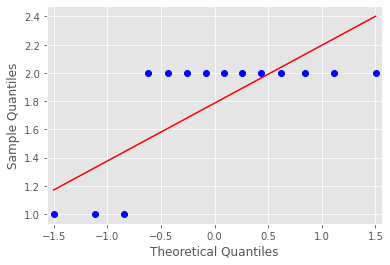


Estadisticos=0.841, p-value=0.000

Como el p-value es: 1.3204011744245024e-11 < 0.05 (5%) ==> rechazamos la Ho y aceptamos la Ha.
Decisión: Con un nivel de significancia del 5%, se afirma que : 
el dato de la variable : Perteneces a alguna pandilla no está normalmente distribuidos.



In [33]:
test_Kolmogorov_Smirnov("Perteneces a alguna pandilla")

In [34]:
#from IPython.display import Image
#Image("box_cox.png",width=250, height=500)

In [35]:
from scipy import stats

In [36]:
df_rendimiento_norm_box_cox, lambda_calc=stats.boxcox(df_rendimiento["Promedio ponderado durante el año"])

In [37]:
lambda_calc

1.1798468312442516

In [38]:
df_rendimiento_norm_box_cox

array([19.84345304, 24.80930137, 16.62903065, 13.50264145, 21.48051935,
       21.48051935, 23.13610183, 21.48051935, 19.84345304, 19.84345304,
       24.80930137, 28.20539912, 16.62903065, 23.13610183, 23.13610183,
       28.20539912, 21.48051935, 19.84345304, 24.80930137, 21.48051935,
       18.2259107 , 23.13610183, 24.80930137, 21.48051935, 19.84345304,
       23.13610183, 19.84345304, 23.13610183, 18.2259107 , 21.48051935,
       23.13610183, 19.84345304, 24.80930137, 21.48051935, 13.50264145,
       19.84345304, 23.13610183, 23.13610183, 23.13610183, 21.48051935,
       15.05410992, 11.97636419, 23.13610183, 15.05410992, 18.2259107 ,
       21.48051935, 19.84345304, 19.84345304, 11.97636419, 23.13610183,
       24.80930137, 19.84345304, 19.84345304, 24.80930137, 21.48051935,
       19.84345304, 19.84345304, 13.50264145, 11.97636419, 18.2259107 ,
       24.80930137, 19.84345304, 21.48051935, 19.84345304, 16.62903065,
       13.50264145, 11.97636419, 16.62903065, 21.48051935, 11.97

In [39]:
#Lo convertimos a DataFrame
df_rendimiento_norm_box_cox=pd.DataFrame(df_rendimiento_norm_box_cox)
df_rendimiento_norm_box_cox

,0
0,19.843453
1,24.809301
2,16.629031
3,13.502641
4,21.480519
5,21.480519
6,23.136102
7,21.480519
8,19.843453
9,19.843453


In [40]:
#Muestra los datos normalizados
df_rendimiento_norm_box_cox.describe()

,0
count,101.000000
mean,19.036552
std,3.945176
min,11.976364
25%,16.629031
50%,19.843453
75%,21.480519
max,28.205399


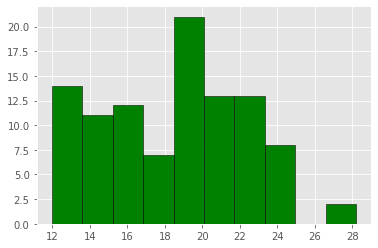

In [41]:
#Graficamente
plt.hist(df_rendimiento_norm_box_cox[0],10, color="green",ec="black")
plt.show()

In [42]:
#Gráfico quantile-quantile
from pylab import *
from matplotlib import pylab, mlab, pyplot

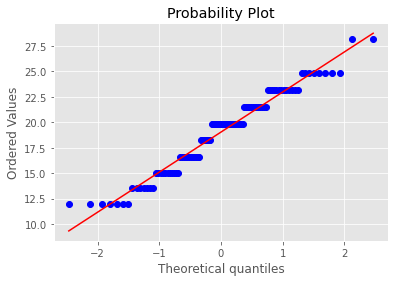

In [43]:
stats.probplot(df_rendimiento_norm_box_cox[0], dist="norm", plot=pylab)
pylab.show()

DIVISION DE DATOS DE ENTRENAMIENTO Y TEST EN FUNCION A ETIQUETAS

In [44]:
# Creando un equivalente de rendimientoT en nuemro rendimientoN
df_under['rendimientoN'] = df_under['rendimientoT'].apply(lambda x: 0 if x == 'Desaprobado' else 1)
df_under.head(8)

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año,rendimientoT,rendimientoN
32,2,15,2,2,2,2,1,2,1,1,1,1,1,1,1,5,1,5,3,3,2,1,4,4,3,2,1,2,0,4,1,18,Aprobado,1
91,2,14,2,2,2,2,3,2,1,1,3,3,1,1,1,5,1,4,3,2,2,1,3,2,3,3,1,3,0,2,1,13,Aprobado,1
57,1,15,2,1,1,2,3,1,3,3,3,5,1,2,2,1,1,4,3,2,1,1,3,1,3,5,2,3,1,2,1,11,Aprobado,1
59,1,15,2,2,2,2,1,2,1,2,2,2,2,1,1,5,1,3,2,1,2,1,4,3,3,4,2,3,0,2,1,14,Aprobado,1
33,2,15,2,1,2,2,1,2,2,1,1,1,1,1,1,4,1,3,3,1,2,1,4,4,3,1,1,1,1,3,2,16,Aprobado,1
92,1,16,1,1,2,2,3,2,1,1,2,2,1,1,1,4,1,3,3,2,1,1,3,3,3,3,4,3,1,2,1,15,Aprobado,1
86,1,15,2,1,2,2,3,2,1,1,2,3,1,2,1,3,1,5,3,3,2,1,3,2,3,2,1,3,1,2,1,13,Aprobado,1
41,2,15,2,2,2,2,3,2,3,3,4,4,2,2,2,0,2,3,2,1,2,1,3,2,4,4,4,3,0,2,1,10,Desaprobado,0


In [45]:
Y=df_rendimiento.pop("rendimientoT")
Y

0         Aprobado
1         Aprobado
2         Aprobado
3         Aprobado
4         Aprobado
5         Aprobado
6         Aprobado
7         Aprobado
8         Aprobado
9         Aprobado
10        Aprobado
11        Aprobado
12        Aprobado
13        Aprobado
14        Aprobado
15        Aprobado
16        Aprobado
17        Aprobado
18        Aprobado
19        Aprobado
20        Aprobado
21        Aprobado
22        Aprobado
23        Aprobado
24        Aprobado
25        Aprobado
26        Aprobado
27        Aprobado
28        Aprobado
29        Aprobado
30        Aprobado
31        Aprobado
32        Aprobado
33        Aprobado
34        Aprobado
35        Aprobado
36        Aprobado
37        Aprobado
38        Aprobado
39        Aprobado
40        Aprobado
41     Desaprobado
42        Aprobado
43        Aprobado
44        Aprobado
45        Aprobado
46        Aprobado
47        Aprobado
48     Desaprobado
49        Aprobado
50        Aprobado
51        Aprobado
52        Ap

In [46]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 32 to 76
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Género                                                                          14 non-null     int64 
 1   Edad                                                                            14 non-null     int64 
 2   Grado de estudios                                                               14 non-null     int64 
 3   Trabajas                                                                        14 non-null     int64 
 4   Consumes drogas                                                                 14 non-null     int64 
 5   Consumes licor                                                                  14 non-null     int64 
 6   Llegas puntual a las  clase

In [47]:
 X = df_under.drop(['rendimientoT', 'rendimientoN'], axis=1)
 y = df_under["rendimientoT"] #Target u variable objetivo

In [48]:
X.head()

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año
32,2,15,2,2,2,2,1,2,1,1,1,1,1,1,1,5,1,5,3,3,2,1,4,4,3,2,1,2,0,4,1,18
91,2,14,2,2,2,2,3,2,1,1,3,3,1,1,1,5,1,4,3,2,2,1,3,2,3,3,1,3,0,2,1,13
57,1,15,2,1,1,2,3,1,3,3,3,5,1,2,2,1,1,4,3,2,1,1,3,1,3,5,2,3,1,2,1,11
59,1,15,2,2,2,2,1,2,1,2,2,2,2,1,1,5,1,3,2,1,2,1,4,3,3,4,2,3,0,2,1,14
33,2,15,2,1,2,2,1,2,2,1,1,1,1,1,1,4,1,3,3,1,2,1,4,4,3,1,1,1,1,3,2,16


In [49]:
X.shape

(14, 32)

In [50]:
y.head()

32    Aprobado
91    Aprobado
57    Aprobado
59    Aprobado
33    Aprobado
Name: rendimientoT, dtype: object

In [51]:
y.shape

(14,)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1956)

In [53]:
print("Entrenamineto x_train: ", X_train.shape)
print("Prueba x_test        : ", X_test.shape)
print("Entrenamiento y_train: ",y_train.shape)
print("Prueba y_test        : ",y_test.shape)

Entrenamineto x_train:  (11, 32)
Prueba x_test        :  (3, 32)
Entrenamiento y_train:  (11,)
Prueba y_test        :  (3,)


In [54]:
X_train.head()

,Género,Edad,Grado de estudios,Trabajas,Consumes drogas,Consumes licor,Llegas puntual a las clases,Perteneces a alguna pandilla,Qué tan responsable se considera,Considera posible terminar el año escolar,Cómo te consideras en los estudios,"Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje",Te gusta estudiar,Estudian en un buen ambiente físico,Te gusta estudiar en grupo,Cuántas horas al día son dedicada al estudio,Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?,Cuántos integrantes hay en su grupo familiar,Cuántos trabajan en su familia,Cuántos de su familia estudian,Cuántos de sus familiares reciben pensión del Estado,Dependes de tus padres,Nivel de educación de su padre,Nivel de educación de su madre,De qué manera el stress influye en su vida escolar,Tiene empatía hacia sus compañeros,Cuando obtienes malas notas. Te sientes,Que cantidad de amigos te gustaría tener,Cantidad de horas que trabaja a la semana,Ingreso familiar aproximado mensualmente,Sus estudios iniciales en que establecimiento lo realizó,Promedio ponderado durante el año
69,1,16,1,1,2,1,3,1,3,3,3,3,1,2,2,1,1,4,2,2,0,1,2,1,3,2,4,1,1,1,1,10
91,2,14,2,2,2,2,3,2,1,1,3,3,1,1,1,5,1,4,3,2,2,1,3,2,3,3,1,3,0,2,1,13
41,2,15,2,2,2,2,3,2,3,3,4,4,2,2,2,0,2,3,2,1,2,1,3,2,4,4,4,3,0,2,1,10
92,1,16,1,1,2,2,3,2,1,1,2,2,1,1,1,4,1,3,3,2,1,1,3,3,3,3,4,3,1,2,1,15
48,2,15,2,1,1,1,3,2,3,3,3,5,2,2,2,1,1,5,3,1,1,2,2,1,2,2,1,1,1,1,3,10


#**APLICANDO MODELOS**

#**Support Vector Machine**

Entrenando y haciendo la predicción

In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC(gamma='auto')

# Entrenado modelo
svm.fit(X_train, y_train)

# Haciendo predicciones
y_pred_svm=svm.predict(X_test)

#la precisión media en los datos de prueba y etiquetas dados
svm.score(X_test, y_test)

1.0

RESULTADOS

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [58]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Classificación de Reporte:\n",classification_report(y_test,y_pred_svm))

Classificación de Reporte:
               precision    recall  f1-score   support

    Aprobado       1.00      1.00      1.00         2
 Desaprobado       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [59]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Valor de exactitud de Support Vector Machine : {acc_svm}")

Valor de exactitud de Support Vector Machine : 1.0


Matriz de Confusión

In [60]:
acc_svm=accuracy_score(y_test,y_pred_svm)
print(f"Accuracy Score de Support Vector Machine es : {acc_svm}")

Accuracy Score de Support Vector Machine es : 1.0


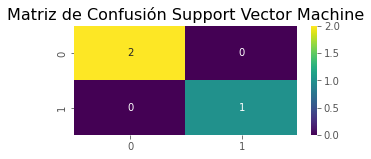

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Support Vector Machine", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

CURVA DE ROC

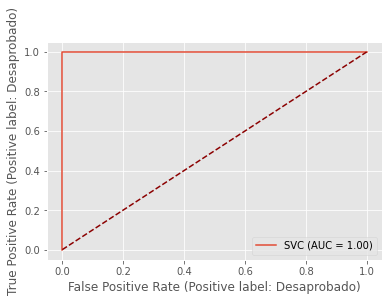

In [62]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm , X_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [63]:
import numpy as np
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import precision_score

In [73]:
Accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("La exactitud del modelo es: ",(Accuracy))
Precision = metrics.precision_score(y_test, y_pred_svm, pos_label="Aprobado")
print("La presición del modelo es: ",(Precision))
Sensitivity_recall = metrics.recall_score(y_test, y_pred_svm, pos_label="Aprobado")
print("La sensibilidad del modelo es: ",(Sensitivity_recall))
Specificity = metrics.recall_score(y_test, y_pred_svm, pos_label="Aprobado")
print("La especificidad del modelo es: ",(Specificity))

La exactitud del modelo es:  1.0
La presición del modelo es:  1.0
La sensibilidad del modelo es:  1.0
La especificidad del modelo es:  1.0


In [74]:
# Librería necesaria para utilizar la métrica Precision
from sklearn.metrics  import  precision_score

In [75]:
from sklearn import svm
model=svm.SVC(kernel="linear",C=100).fit(X_train, y_train)

In [78]:
import pickle
pkl_filename= "pickle_model.pkl"
with open(pkl_filename, "wb")as file:
  pickle.dump(model,file)

In [79]:
pkl_filename= "pickle_model.pkl"
with open(pkl_filename, "rb")as file:
  model= pickle.load(file)

In [139]:
score=model.score(X_test, y_test)
print(score)

1.0


In [162]:
x_in=np.asarray([1,1,1,2,3,1,1,1,2,1,4,1,1,4,1,1,1,2,3,1,1,1,2,1,4,1,1,4,1,1,1,13]).reshape(1,-1)
predicts=model.predict(x_in)
predicts[0]


'Aprobado'

#**NAIVES BAYES**

In [80]:
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("ggplot")

In [81]:
from sklearn.feature_selection import SelectKBest

In [82]:
best=SelectKBest(k=15)# Seleccionar las mejores 15 variables 
X_new = best.fit_transform(X, y) # ajusta 
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Consumes licor', 'Qué tan responsable se considera',
       'Considera posible terminar el año escolar',
       'Cómo te consideras en los estudios',
       'Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje',
       'Te gusta estudiar', 'Estudian en un buen ambiente físico',
       'Te gusta estudiar en grupo',
       'Cuántas horas al día son dedicada al estudio',
       'Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?',
       'Cuántos de sus familiares reciben pensión del Estado',
       'Nivel de educación de su padre', 'Nivel de educación de su madre',
       'Ingreso familiar aproximado mensualmente',
       'Promedio ponderado durante el año'],
      dtype='object')


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

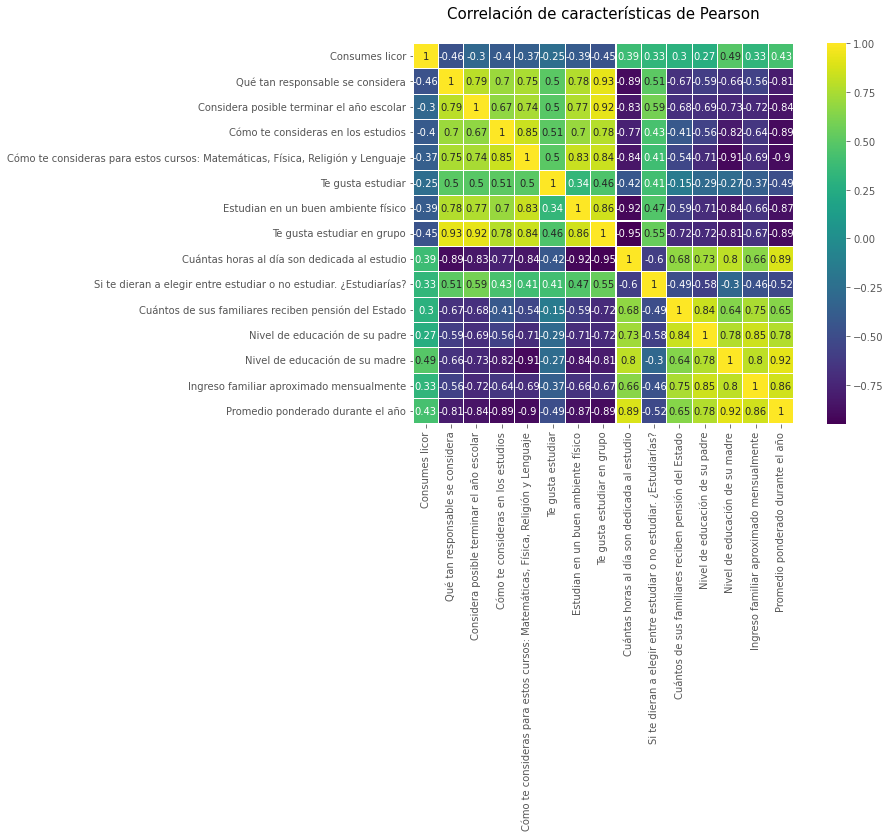

In [84]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,7))
plt.title('Correlación de características de Pearson', y=1.05, size=15)
sns.heatmap(df_under[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Modelo y Entrenamiento

In [85]:
# Llamamos al objeto
gnb = GaussianNB()

# Entrenamos al modelo
gnb.fit(X_train[used_features].values,y_train)

# Hacemos las predicciones
y_pred = gnb.predict(X_test[used_features]);

In [86]:
#PREDICCION
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

acc_nb = accuracy_score(y_test, y_pred)
print("Reporte de Classificación Naive Bayes:\n",classification_report(y_test,y_pred))

Reporte de Classificación Naive Bayes:
               precision    recall  f1-score   support

    Aprobado       1.00      1.00      1.00         2
 Desaprobado       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [87]:
#RESULTADO
print('Precisión en el conjuto de prueba: {:.2f}'.format(gnb.score(X_test[used_features], y_test)))
print("--"*30)
print('Accuracy en el conjunto de Entrenamiento: {:.2f}'.format(gnb.score(X_train[used_features], y_train)))

Precisión en el conjuto de prueba: 1.00
------------------------------------------------------------
Accuracy en el conjunto de Entrenamiento: 1.00


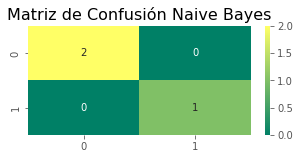

In [88]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Naive Bayes", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "summer",fmt = '.0f')
    
plt.show();

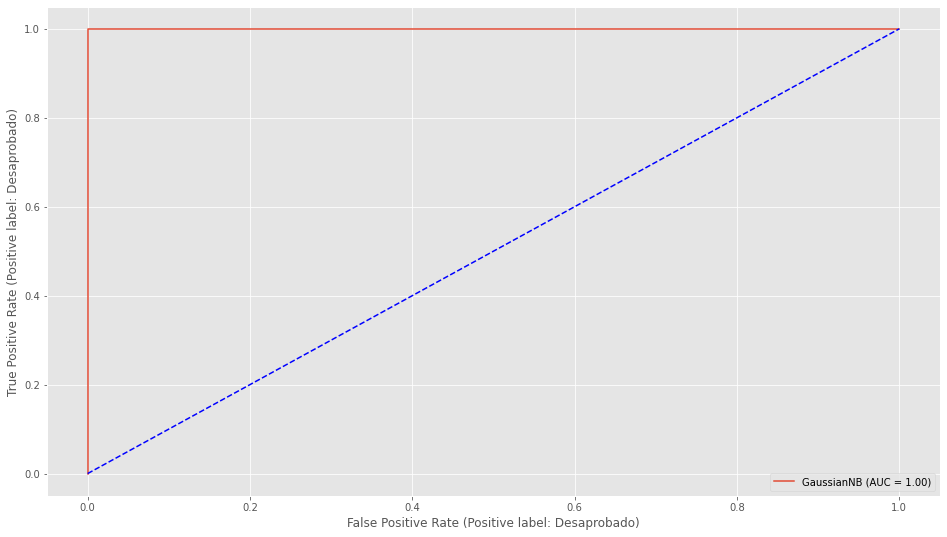

In [89]:
#CURVA ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb , X_test[used_features], y_test )
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.show();

In [125]:
["rendimientoG", 'Llegas puntual a las  clases', 'Qué tan responsable se considera',
       'Considera posible terminar el año escolar',
       'Cómo te consideras en los estudios',
       'Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje',
       'Te gusta estudiar', 'Estudian en un buen ambiente físico',
       'Te gusta estudiar en grupo',
       'Cuántas horas al día son dedicada al estudio',
       'Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?',
       'Nivel de educación de su padre', 'Nivel de educación de su madre',
       'Tiene empatía hacia sus compañeros',
       'Ingreso familiar aproximado mensualmente',
       'Promedio ponderado durante el año',"rendimientoN"]

print(gnb.predict([[1,1,1,2,3,1,1,1,2,1,4,1,1,4,13],
                   [2,4,2,4,5,2,2,2,0,2,1,2,2,1,10]]))
#Resultado esperado 1-Aprobado, 0-Desaprobado

['Aprobado' 'Desaprobado']


In [91]:
pip install metric_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 2.7 MB/s eta 0:00:00


In [92]:
import numpy as np
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import precision_score

In [93]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("La exactitud del modelo es: ",(Accuracy))
Precision = metrics.precision_score(y_test, y_pred, pos_label="Aprobado")
print("La presición del modelo es: ",(Precision))
Sensitivity_recall = metrics.recall_score(y_pred, y_test,pos_label="Aprobado")
print("La sensibilidad del modelo es: ",(Sensitivity_recall))
Specificity = metrics.recall_score(y_test, y_pred, pos_label="Aprobado")
print("La especificidad del modelo es: ",(Specificity))

La exactitud del modelo es:  1.0
La presición del modelo es:  1.0
La sensibilidad del modelo es:  1.0
La especificidad del modelo es:  1.0


In [94]:
from sklearn import svm
model=svm.SVC(kernel="linear",C=100).fit(X_train, y_train)

In [96]:
import pickle
pkl_filename="pickle_model.pkl"
with open(pkl_filename, "wb")as file:
  pickle.dump(model,file)

In [97]:
import pickle
pkl_filename="pickle_model.pkl"
with open(pkl_filename, "rb")as file:
  model=pickle.load(file)

In [98]:
score=model.score(X_test, y_test)
print(score)

1.0


Probando con muestra nueva

In [126]:
print(gnb.predict([[1,1,1,2,3,1,1,1,2,1,4,1,1,4,13],
                   [2,4,2,4,5,2,2,2,0,2,1,2,2,1,10]]))

['Aprobado' 'Desaprobado']


#**Arbol de Decisión**

In [127]:
from sklearn.tree import DecisionTreeClassifier

# Llamamo al objeto clasificador
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

# Entrenamos el modelo
dtree.fit(X_train,y_train)

# Hacemos predicciones
y_pred_dt=dtree.predict(X_test)

In [128]:
col_num = df_under.select_dtypes(include=['float64', 'int64']).columns
col_num

Index(['Género', 'Edad', 'Grado de estudios', 'Trabajas', 'Consumes drogas',
       'Consumes licor', 'Llegas puntual a las  clases',
       'Perteneces a alguna pandilla', 'Qué tan responsable se considera',
       'Considera posible terminar el año escolar',
       'Cómo te consideras en los estudios',
       'Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje',
       'Te gusta estudiar', 'Estudian en un buen ambiente físico',
       'Te gusta estudiar en grupo',
       'Cuántas horas al día son dedicada al estudio',
       'Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?',
       'Cuántos integrantes hay en su grupo familiar',
       'Cuántos trabajan en su familia', 'Cuántos de su familia estudian',
       'Cuántos de sus familiares reciben pensión del Estado',
       'Dependes de tus padres', 'Nivel de educación de su padre',
       'Nivel de educación de su madre',
       'De qué manera el stress influye en su vida escolar',
       '

In [129]:
X.columns

Index(['Género', 'Edad', 'Grado de estudios', 'Trabajas', 'Consumes drogas',
       'Consumes licor', 'Llegas puntual a las  clases',
       'Perteneces a alguna pandilla', 'Qué tan responsable se considera',
       'Considera posible terminar el año escolar',
       'Cómo te consideras en los estudios',
       'Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje',
       'Te gusta estudiar', 'Estudian en un buen ambiente físico',
       'Te gusta estudiar en grupo',
       'Cuántas horas al día son dedicada al estudio',
       'Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?',
       'Cuántos integrantes hay en su grupo familiar',
       'Cuántos trabajan en su familia', 'Cuántos de su familia estudian',
       'Cuántos de sus familiares reciben pensión del Estado',
       'Dependes de tus padres', 'Nivel de educación de su padre',
       'Nivel de educación de su madre',
       'De qué manera el stress influye en su vida escolar',
       '

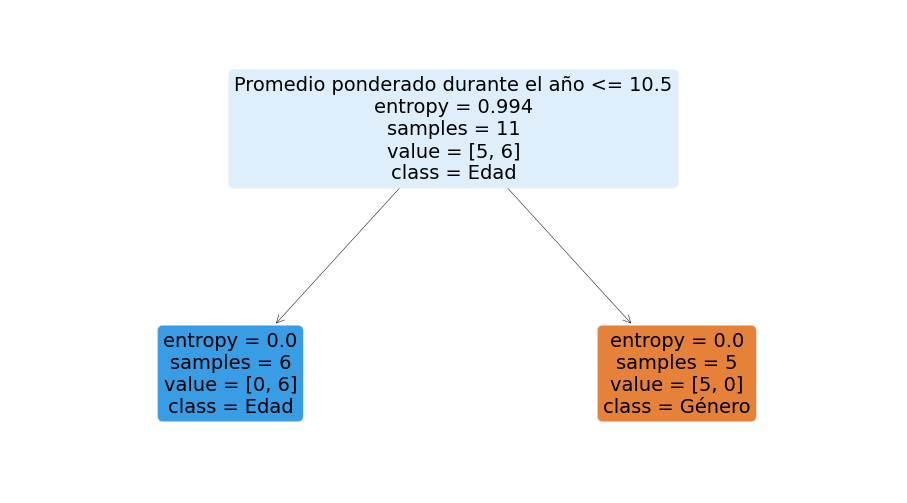

In [130]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,class_names =(col_num),
         filled = True , precision = 4, rounded = True)

In [131]:
#RESULTADOS
clf =print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

    Aprobado       1.00      1.00      1.00         2
 Desaprobado       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [132]:
#MATRIZ DE CONFUSION
acc_dt=accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score de Decision Tree es : {acc_dt}")

Accuracy Score de Decision Tree es : 1.0


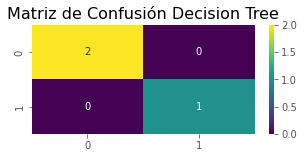

In [133]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Decision Tree", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

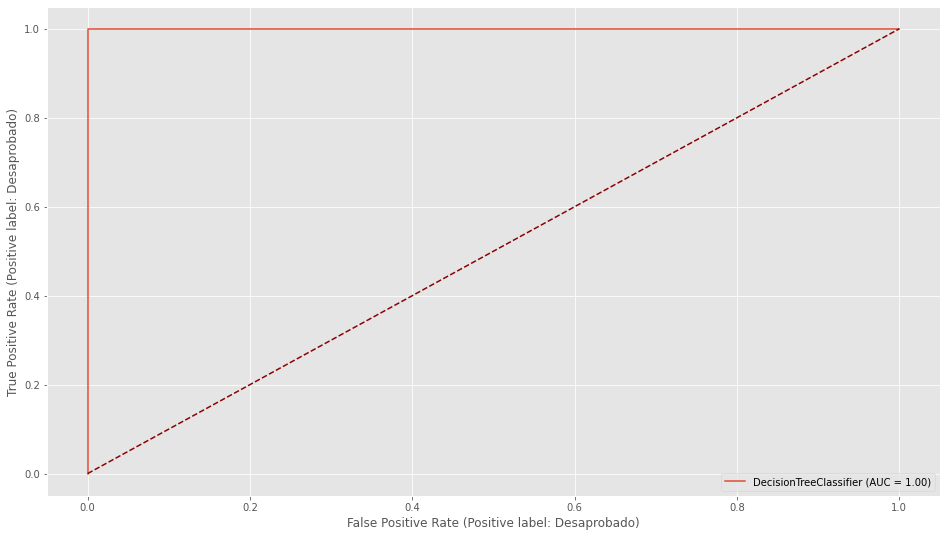

In [134]:
#CURVA DE ROC
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtree , X_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [135]:
["rendimientoG", 'Llegas puntual a las  clases', 'Qué tan responsable se considera',
       'Considera posible terminar el año escolar',
       'Cómo te consideras en los estudios',
       'Cómo te consideras para estos cursos: Matemáticas, Física, Religión y Lenguaje',
       'Te gusta estudiar', 'Estudian en un buen ambiente físico',
       'Te gusta estudiar en grupo',
       'Cuántas horas al día son dedicada al estudio',
       'Si te dieran a elegir entre estudiar o no estudiar. ¿Estudiarías?',
       'Nivel de educación de su padre', 'Nivel de educación de su madre',
       'Tiene empatía hacia sus compañeros',
       'Ingreso familiar aproximado mensualmente',
       'Promedio ponderado durante el año',"rendimientoN"]
      
print(gnb.predict([[1,1,1,2,3,1,1,1,2,1,4,1,1,4,13],
                   [2,4,2,4,5,2,2,2,0,2,1,2,2,1,10]]))
#Resultado esperado 1-Aprobado, 0-Desaprobado

['Aprobado' 'Desaprobado']


In [136]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("La exactitud del modelo es: ",(Accuracy))
Precision = metrics.precision_score(y_test, y_pred,pos_label="Aprobado")
print("La presición del modelo es: ",(Precision))
Sensitivity_recall = metrics.recall_score(y_pred, y_test,pos_label="Aprobado")
print("La sensibilidad del modelo es: ",(Sensitivity_recall))
Specificity = metrics.recall_score(y_test, y_pred, pos_label="Aprobado")
print("La especificidad del modelo es: ",(Specificity))

La exactitud del modelo es:  1.0
La presición del modelo es:  1.0
La sensibilidad del modelo es:  1.0
La especificidad del modelo es:  1.0


#**RESULTADO**

In [137]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine','Naives Bayes','Decision Tree'],
              'Accuracy': [acc_svm,acc_nb,acc_dt]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Support Vector Machine,1.0
1,Naives Bayes,1.0
2,Decision Tree,1.0


In [138]:
import plotly.express as px
fig = px.bar (models, x="Model", 
                   y="Accuracy", 
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'], 
                   title='Accuracy de los Modelos')
fig.update_layout(bargap=0.6)
fig.show()